In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tumor-imgs/tumor/TMR_375.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_144.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_461.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_338.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_474.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_31.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_350.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_118.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_141.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_19.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_344.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_295.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_184.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_340.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_266.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_390.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_491.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_384.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_284.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_292.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_376.jpeg
/kaggle/input/tumor-imgs/tumor/TMR_498.jpeg
/kaggle/input/tumor-imgs/tumor/TMR

In [16]:
## Load all the necessary packages

%matplotlib inline

import matplotlib.pyplot as plt
import skimage.transform
from skimage import data, io, filters
import numpy as np
from numpy import array
from skimage.transform import rescale, resize
from skimage.transform import resize
import os
import PIL
import pandas as pd
import imageio


from matplotlib.pyplot import imread
import cv2

In [17]:
## Load Directory Paths

def load_path(path):
    directories = []
    if os.path.isdir(path):
        print('directory path: ', path)
        directories.append(path)
    for elem in os.listdir(path): #check for nested dir within parent dir
        if os.path.isdir(os.path.join(path,elem)):
            print('inside nested dir')
            directories = directories + load_path(os.path.join(path,elem))
            directories.append(os.path.join(path,elem))
    print('directories: ', directories)
    return directories

In [18]:
## Load Images from directory

def load_data_from_dirs(dirs, ext):
    files = []
    file_names = []
    count = 0
    
    for d in dirs:
        for f in os.listdir(d):
            if f.endswith(ext):
                image = cv2.imread(os.path.join(d,f))
                files.append(image)
                file_names.append(os.path.join(d,f))
                count = count + 1
    
    print('list of files: ',len(files))
    print('list of files path: ', len(file_names), 'file path: ', file_names[0])
    print('Files Read: ',count)
    
    return files   

In [19]:
## Load Images

def load_data(directory, ext):
    files = load_data_from_dirs(load_path(directory), ext)
    return files

In [20]:
files = load_data("../input/tumor-imgs/tumor", ".jpeg")

directory path:  ../input/tumor-imgs/tumor
directories:  ['../input/tumor-imgs/tumor']
list of files:  500
list of files path:  500 file path:  ../input/tumor-imgs/tumor/TMR_375.jpeg
Files Read:  500


In [21]:
tumors = []
for i in range(len(files)):
    tumors.append(cv2.cvtColor(cv2.UMat(files[i]), cv2.COLOR_RGB2GRAY))

In [22]:
def displayImages(img_arr):    
    width=8
    height=8
    rows = 3
    cols = 4
    axes=[]

    fig=plt.figure(figsize=(10,10))

    for i in range(rows * cols):
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("Image: "+str(i+1))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img_arr[i].get().astype('f'))
        plt.axis('off')
    fig.tight_layout()    
    plt.show()

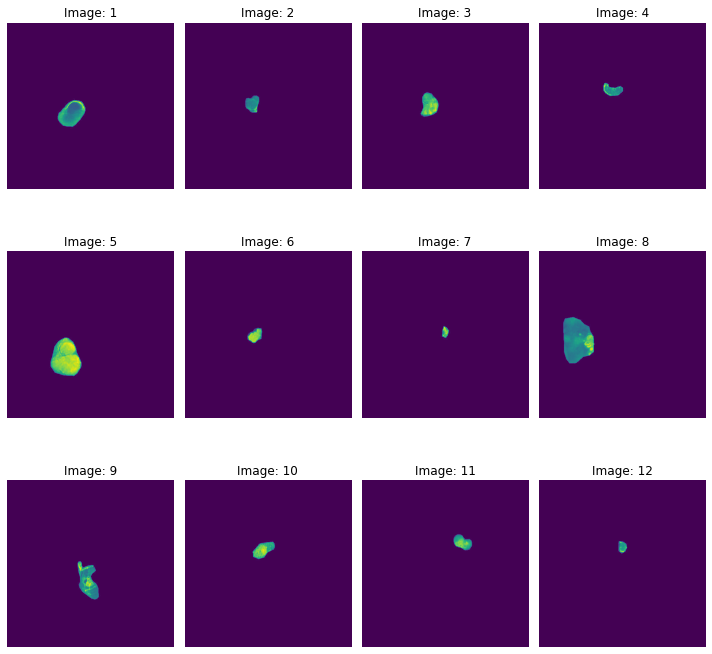

In [23]:
displayImages(tumors)

In [24]:
# img = cv2.cvtColor(cv2.UMat(files[0]), cv2.COLOR_RGB2GRAY)

In [26]:
tumor_regions = []
contours_regions = []
for img in tumors:
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    ## get the biggest contour
    biggest_cntr = max(contours, key = cv2.contourArea)
    img_cpy = img.get().copy()
    ## Apply Polygon Curve approximation to extract out the tumor
    eps = 0.01 * cv2.arcLength(biggest_cntr, True)
    approx = cv2.approxPolyDP(biggest_cntr, eps, True)
    contours_regions.append(cv2.drawContours(img_cpy, [approx],0,(255,0,0), 3))
    
    ## Bounding Rectangle
    (x,y,w,h) = cv2.boundingRect(biggest_cntr)
    
    
    ## Get the polygon cordinates
#     points = np.squeeze(approx.get())

    ## Extract rows and columns
#     y = points[:, 1]
#     x = points[:, 0]

    ## Crop the tumor region
#     (topy, topx) = (np.min(y), np.min(x))
#     (bottomy, bottomx) = (np.max(y), np.max(x))
#     out_img = img.get()[topy:bottomy+1, topx:bottomx+1]
    tumor_regions.append(img.get()[y:y+h, x:x+w])

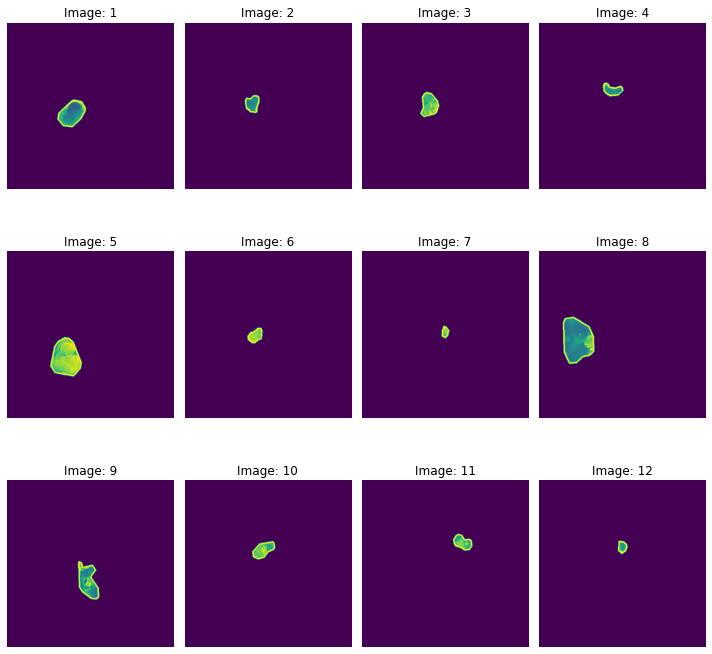

In [27]:
displayImages(contours_regions)

In [28]:
def displayTumors(img_arr):    
    width=8
    height=8
    rows = 3
    cols = 4
    axes=[]

    fig=plt.figure(figsize=(10,10))

    for i in range(rows * cols):
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("Image: "+str(i+1))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img_arr[i].astype('float32').squeeze())
        plt.axis('off')
    fig.tight_layout()    
    plt.show()

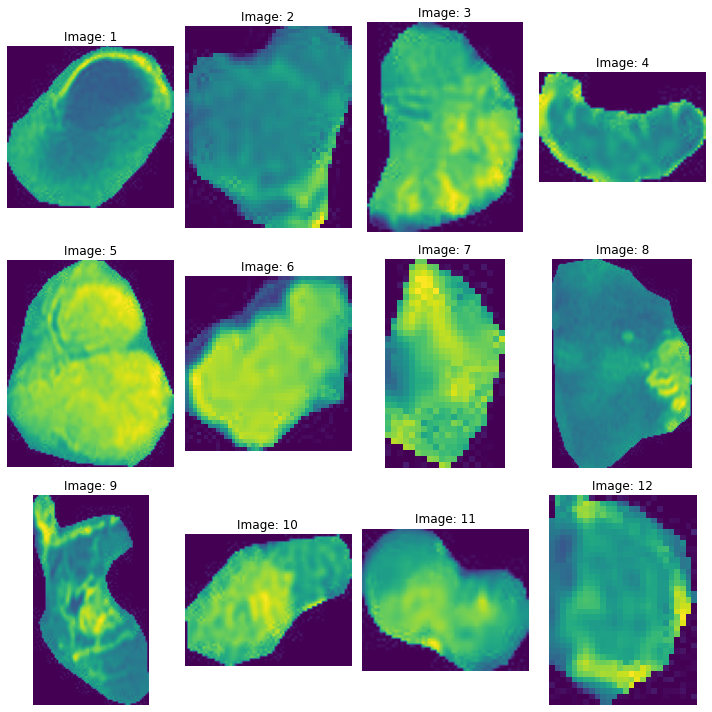

In [29]:
displayTumors(tumor_regions)

In [ ]:
img = tumors[0]

In [ ]:
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
print(len(contours))

In [ ]:
for cntr in contours:
    eps = 0.01 * cv2.arcLength(cntr, True)
    approx = cv2.approxPolyDP(cntr, eps, True)
    print(approx.get())
    img = cv2.drawContours(img, [approx],0,(255,0,0), 3)

In [ ]:
plt.imshow(img.get().squeeze())
plt.axis('off')

In [ ]:
# print(contours[0].get().astype('int'))

In [ ]:
cnt = max(contours, key = cv2.contourArea)

In [ ]:
eps = 0.01 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, eps, True)

In [ ]:
#contours[0].get().astype('int')

# Remove singleton dimensions
points = np.squeeze(approx.get())

# Extract rows and columns
y = points[:, 1]
x = points[:, 0]

# Now crop
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = img.get()[topy:bottomy+1, topx:bottomx+1]

In [ ]:
plt.imshow(out)
plt.axis('off')